In [8]:
# -*- coding:utf-8 -*-
# 9.2.2 模型构建
### 1 模型输入 # 80% 做训练集、20% 做测试集

# 数据抽样代码

import pandas as pd
from pandas import DataFrame,Series
import random 
import numpy as np

inputfile = 'moment.csv'
data = pd.read_csv(inputfile, encoding='gbk')
# 注意，此处不能用shuffle
sampler = np.random.permutation(len(data))
d = data.take(sampler).as_matrix()

data_train = d[:int(0.8*len(data)),:] #选取前80%做训练集
data_test = d[int(0.8*len(data)):,:] #选取后20%做测试集


In [9]:
# 构建支持向量机模型代码
x_train = data_train[:, 2:]*30 #放大特征
y_train = data_train[:,0].astype(int)
x_test = data_test[:, 2:]*30 #放大特征
y_test = data_test[:,0].astype(int)

# 导入模型相关的支持向量机函数  建立并且训练模型
from sklearn import svm 
model = svm.SVC()
model.fit(x_train, y_train)
import pickle
pickle.dump(model, open('svcmodel.model','wb'))# model = pickle.load(open('svcmodel.model','rb'))

# 导入输出相关的库，生成混淆矩阵
from sklearn import metrics
cm_train = metrics.confusion_matrix(y_train, model.predict(x_train)) # 训练样本的混淆矩阵

cm_test = metrics.confusion_matrix(y_test, model.predict(x_test)) # 测试样本的混淆矩阵

df1 = DataFrame(cm_train, index = range(1,6), columns=range(1,6))
df2 = DataFrame(cm_test, index = range(1,6), columns=range(1,6))
df1.to_excel('trainPre.xlsx')
df2.to_excel('testPre.xlsx')
print model.score(x_train,y_train) # 评价模型训练的准确率
print model.score(x_test,y_test) # 评价模型测试的准确率

0.950617283951
0.878048780488


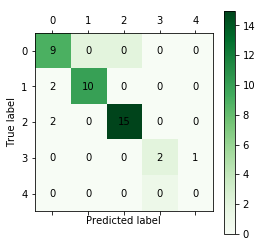

In [10]:
import matplotlib.pyplot as plt #导入作图库
% matplotlib inline
plt.matshow(cm_test, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
plt.colorbar() #颜色标签
  
for x in range(len(cm_test)): #数据标签
    for y in range(len(cm_test)):
        plt.annotate(cm_test[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')

plt.ylabel('True label') #坐标轴标签
plt.xlabel('Predicted label') #坐标轴标签
plt.show()

# '''
# 等价于下面这段
# from cm_plot import *
# cm_plot(y_train, model.predict(x_train)).show() # cm_plot是自定义的画混淆矩阵的函数
# '''